# Feature Selection Techniques 

Program to implement various feature selection techniques
and compare the performance with a classifier

### Correlation Filter Method – Pearson Correlation Coefficient 

In [ ]:
# Correlation Filter Method – Pearson Correlation Coefficient 
import pandas as pd 
import numpy as np 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score 

data = pd.read_csv('breast_cancer.csv') 
data = data.sample(frac=1) 
dataset = np.array(data) #data now converted to numpy arrray 
print(dataset.shape)

X = dataset[:,2:32]
Y = dataset[:,1] 

#Label encoder code - Converting M and B to 1 and 0 
le = preprocessing.LabelEncoder() 
Y = le.fit_transform(Y) 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20) 

print(X_train.shape) 
print(X_test.shape) 
print(Y_train.shape) 
print(Y_test.shape)

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 
model = GaussianNB() 
model.fit(X_train,Y_train) 
predicted_target = model.predict(X_test) 

accuracy = accuracy_score(Y_test,predicted_target) 
print("Naive bayes without feature selection:", accuracy) 


(569, 33)
(455, 30)
(114, 30)
(455,)
(114,)
Naive bayes without feature selection: 0.9298245614035088


In [ ]:
#Pearson Correlation Filter Method 
p_X_train = pd.DataFrame(X_train) 
p_X_test = pd.DataFrame(X_test) 
p_corr_features = set() 
p_corr_matrix = p_X_train.corr() 

for i in range(len(p_corr_matrix.columns)): 
    for j in range(i):
        if abs(p_corr_matrix.iloc[i,j]) > 0.8: 
            colname = p_corr_matrix.columns[i] 
            p_corr_features.add(colname) 

p_X_train.drop(labels=p_corr_features, axis = 1, inplace=True) 
p_X_test.drop(labels=p_corr_features, axis = 1, inplace=True) 

model = GaussianNB() 
model.fit(p_X_train,Y_train)
predicted_target = model.predict(p_X_test) 

print("Naive Bayes with feature selection pearson correlation:", accuracy_score(Y_test,predicted_target)) 


Naive Bayes with feature selection pearson correlation: 0.9122807017543859


### ROC and AUC with Pearson Correlation Coefficienta

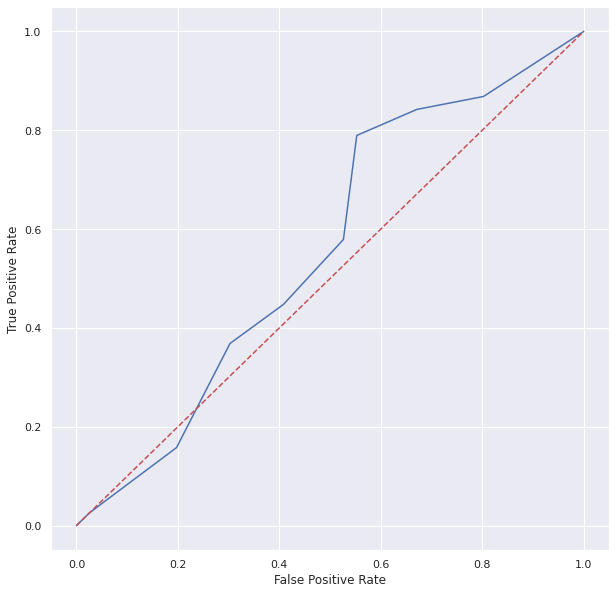

In [ ]:
#ROC and AUC with Pearson Correlation Coefficient 
from sklearn import metrics 

def predict_proba(x): 
    return(np.random.uniform(0, 1, p_X_test.shape[0])) 

def roc_curve(y, prob): 
    tpr_list = [] 
    fpr_list = [] 
    threshold = np.linspace(1.1, 0, 10) 
    for t in threshold: 
         y_pred = np.zeros(y.shape[0])
         y_pred[prob >= t] = 1
         TN = y_pred[(y_pred == Y_test) & (Y_test == 0)].shape[0]
         TP = y_pred[(y_pred == Y_test) & (Y_test == 1)].shape[0]
         FP = y_pred[(y_pred != Y_test) & (Y_test == 0)].shape[0]
         FN = y_pred[(y_pred != Y_test) & (Y_test == 1)].shape[0]
         TPR = TP / (TP + FN)
         FPR = FP / (FP + TN)
         tpr_list.append(TPR)
         fpr_list.append(FPR)
    return fpr_list, tpr_list, threshold

prob = predict_proba(p_X_test)
fpr, tpr, threshold = roc_curve(Y_test, prob)

plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.show()


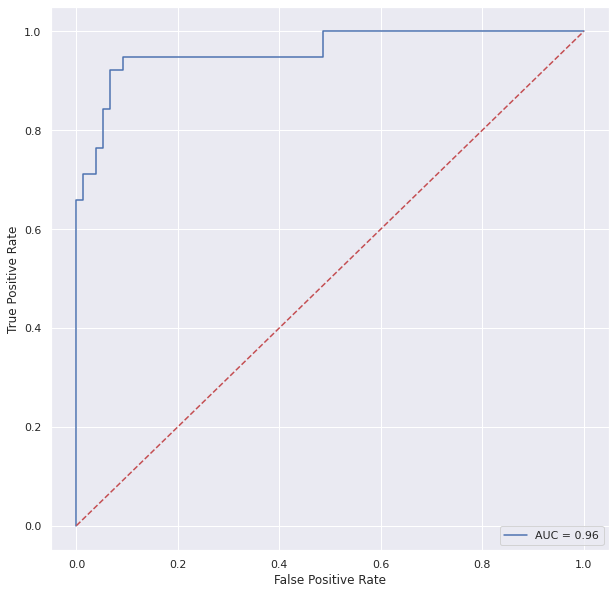

In [ ]:
#AUC
probs = model.predict_proba(p_X_test)
prob=probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, prob)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = "AUC = %0.2f" % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate" , fontsize=12)
plt.ylabel("True Positive Rate" , fontsize=12)
plt.show()

### Correlation Filter Method – Spearman’s Rank Correlation Coefficient

In [ ]:
#Correlation Filter Method – Spearman’s Rank Correlation Coefficient
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
data = pd.read_csv('breast_cancer.csv')
data = data.sample(frac=1)
dataset = np.array(data) #data now converted to numpy arrray
X = dataset[:,2:32]
Y = dataset[:,1]
#Label encoder code - Converting M and B to 1 and 0
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = GaussianNB()
model.fit(X_train,Y_train)
predicted_target = model.predict(X_test)
accuracy = accuracy_score(Y_test,predicted_target)
print("Naive bayes without feature selection:", accuracy)

Naive bayes without feature selection: 0.9385964912280702


In [ ]:
#Spearman Correlation Filter Method
p_X_train = pd.DataFrame(X_train)
p_X_test = pd.DataFrame(X_test)
p_corr_features = set()
p_corr_matrix = p_X_train.corr(method="spearman")
for i in range(len(p_corr_matrix.columns)):
    for j in range(i):
        if abs(p_corr_matrix.iloc[i,j]) > 0.8:
             colname = p_corr_matrix.columns[i]
             p_corr_features.add(colname)
p_X_train.drop(labels=p_corr_features, axis = 1, inplace=True)
p_X_test.drop(labels=p_corr_features, axis = 1, inplace=True)
model = GaussianNB()
model.fit(p_X_train,Y_train)
predicted_target = model.predict(p_X_test)
print("Naive Bayes with feature selection sperman correlation:", accuracy_score(Y_test,predicted_target))

Naive Bayes with feature selection sperman correlation: 0.9298245614035088


### Correlation Filter Method – Kendall’s Rank Correlation Coefficient

In [ ]:
#Correlation Filter Method – Kendall’s Rank Correlation Coefficient
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
data = pd.read_csv('breast_cancer.csv')
data = data.sample(frac=1)
dataset = np.array(data)
X = dataset[:,2:32]
Y = dataset[:,1]
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = GaussianNB()
model.fit(X_train,Y_train)
predicted_target = model.predict(X_test)
accuracy = accuracy_score(Y_test,predicted_target)
print("Naive bayes without feature selection:", accuracy)

Naive bayes without feature selection: 1.0


In [ ]:
#Kendall Correlation Filter Method
p_X_train = pd.DataFrame(X_train)
p_X_test = pd.DataFrame(X_test)
p_corr_features = set()
p_corr_matrix = p_X_train.corr(method="kendall")
for i in range(len(p_corr_matrix.columns)):
    for j in range(i):
        if abs(p_corr_matrix.iloc[i,j]) > 0.8:
            colname = p_corr_matrix.columns[i]
            p_corr_features.add(colname)
p_X_train.drop(labels=p_corr_features, axis = 1, inplace=True)
p_X_test.drop(labels=p_corr_features, axis = 1, inplace=True)
model = GaussianNB()
model.fit(p_X_train,Y_train)
predicted_target = model.predict(p_X_test)
print("Naive Bayes with feature selection kendall correlation:", accuracy_score(Y_test,predicted_target))

Naive Bayes with feature selection kendall correlation: 0.9385964912280702


### Statistical & Ranking Filter Method – Mutual Information

In [ ]:
#Statistical & Ranking Filter Method – Mutual Information
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = pd.read_csv('breast_cancer.csv')
data = data.sample(frac=1)
dataset = np.array(data)

X = dataset[:,2:32]
Y = dataset[:,1]
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = GaussianNB()
model.fit(X_train,Y_train)
predicted_target = model.predict(X_test)
accuracy = accuracy_score(Y_test,predicted_target)
print("Naive bayes without feature selection:", accuracy)

#Mutual information feature selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

#select the no of features you want to retain
select_k = 5
s_x_train = pd.DataFrame(X_train)
s_x_test = pd.DataFrame(X_test)

#get only numerical features
numerical_x_train = s_x_train[s_x_train.select_dtypes ([np.number]) .columns]

#create the SelectKBest with the mutual info strategy
selection = SelectKBest(mutual_info_classif, k= select_k).fit (numerical_x_train,Y_train)

#display the retained features
features = s_x_train.columns[selection.get_support()]
print(features)

#processing for having only retained features in the training set
n_features = np.zeros(30-select_k)
k = 0

for i in range(30):
    if i not in features:
        n_features[k] = i
        k = k+1
print(n_features)

s_x_train.drop(labels = n_features, axis = 1, inplace = True)
s_x_test.drop(labels = n_features, axis = 1, inplace = True)
print(s_x_train.shape)
print(s_x_test.shape)

model = GaussianNB()
model.fit(s_x_train, Y_train)
predicted_target = model.predict(s_x_test)
print("Naive Bayes with feature selection mutual information", accuracy_score(Y_test,predicted_target))

Naive bayes without feature selection: 0.9122807017543859
Int64Index([7, 20, 22, 23, 27], dtype='int64')
[ 0.  1.  2.  3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 21. 24. 25. 26. 28. 29.]
(455, 5)
(114, 5)
Naive Bayes with feature selection mutual information 0.9385964912280702


### Statistical & Ranking Filter Method – Anova Univariate Test

In [ ]:
#Statistical & Ranking Filter Method – Anova Univariate Test
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

data = pd.read_csv('breast_cancer.csv')
data = data.sample(frac=1)
dataset = np.array(data)

X = dataset[:,2:32]
Y = dataset[:,1]
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = GaussianNB()
model.fit(X_train,Y_train)
predicted_target = model.predict(X_test)
accuracy = accuracy_score(Y_test,predicted_target)
print("Naive bayes without feature selection:", accuracy)

#Anova Univariate feature selection
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
select_k = 5
s_x_train = pd.DataFrame(X_train)
s_x_test = pd.DataFrame(X_test)
selection = SelectKBest(f_classif, k= select_k).fit(s_x_train,Y_train)
features = s_x_train.columns[selection.get_support()]
print(features)
n_features = np.zeros(30-select_k)
k = 0
for i in range(30):
    if i not in features:
        n_features[k] = i
        k = k+1
print(n_features)
s_x_train.drop(labels = n_features, axis = 1, inplace = True)
s_x_test.drop(labels = n_features, axis = 1, inplace = True)
print(s_x_train.shape)
print(s_x_test.shape)
model = GaussianNB()
model.fit(s_x_train, Y_train)
predicted_target = model.predict(s_x_test)
print("Naive Bayes with feature selection anova univariate:", accuracy_score(Y_test,predicted_target))

Naive bayes without feature selection: 0.956140350877193
Int64Index([7, 20, 22, 23, 27], dtype='int64')
[ 0.  1.  2.  3.  4.  5.  6.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 21. 24. 25. 26. 28. 29.]
(455, 5)
(114, 5)
Naive Bayes with feature selection anova univariate: 0.9473684210526315


### Wrapper Methods

In [ ]:
#Wrapper Methods
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
data = pd.read_csv('breast_cancer.csv')
data = data.sample(frac=1)
dataset = np.array(data)
X = dataset[:,2:32]
Y = dataset[:,1]
le = preprocessing.LabelEncoder()
Y = le.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = GaussianNB()
model.fit(X_train,Y_train)
predicted_target = model.predict(X_test)
accuracy = accuracy_score(Y_test,predicted_target)
print("Naive bayes without feature selection:", accuracy)

#Step Forward
from mlxtend.feature_selection import SequentialFeatureSelector

# create the SequentialFeatureSelector object, and configure the parameters.
sfs = SequentialFeatureSelector(GaussianNB(),
k_features=10,
forward=True,
floating=False,
scoring='accuracy',cv=2)

# fit the object to the training data.
sfs = sfs.fit(X_train, Y_train)
print("Step Forward Feature Selection Score: ", sfs.k_score_)

# transform to the newly selected features.
x_train_sfs = sfs.transform(X_train)
x_test_sfs = sfs.transform(X_test)

#Step Backward
sbs = SequentialFeatureSelector(GaussianNB(),
k_features=10,
forward=False,
floating=False,
scoring='accuracy',cv=2)
sbs = sbs.fit(X_train, Y_train)
print("Step Backward Feature Selection Score: ",sbs.k_score_)
x_train_sfs = sbs.transform(X_train)
x_test_sfs = sbs.transform(X_test)

#Step Floating Forward
sbs = SequentialFeatureSelector(GaussianNB(),
k_features=10,
forward=True,
floating=True,
scoring='accuracy',cv=2)
sbs = sbs.fit(X_train, Y_train)
print("Step Floating Forward Feature Selection Score: ",sbs.k_score_)
x_train_sfs = sbs.transform(X_train)
x_test_sfs = sbs.transform(X_test)

#Step Floating Backward
sbs = SequentialFeatureSelector(GaussianNB(),
k_features=10,
forward=False,
floating=True,
scoring='accuracy', cv=2)
sbs = sbs.fit(X_train, Y_train)
print("Step Floating Backward Feature Selection Score: ",sbs.k_score_)
x_train_sfs = sbs.transform(X_train)
x_test_sfs = sbs.transform(X_test)

Naive bayes without feature selection: 0.9035087719298246


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Step Forward Feature Selection Score:  0.9780411932915991
Step Backward Feature Selection Score:  0.9648349949764279
Step Floating Forward Feature Selection Score:  0.9780411932915991
Step Floating Backward Feature Selection Score:  0.9670279774325682
